In [1]:
import pandas as pd
import numpy as np

import os

In [2]:
## Costs for Monte Carlo Simulation

# 抽样次数
num_samples = 100

In [3]:
## Inputs
## Costs - Tradional Sludge Treatment （water content:45%）

# ICs
IC_landappli = np.random.uniform(57, 108, num_samples)
IC_building = np.random.uniform(50, 83,num_samples)
IC_inci = np.random.uniform(76, 178,num_samples)
IC_landfill = np.random.uniform(38,51,num_samples)
IC_other = np.random.uniform(54,106, num_samples)

# OCs
OC_landappli = np.random.uniform(250, 389, num_samples)
OC_building = np.random.uniform(91, 364,num_samples)
OC_inci = np.random.uniform(333, 1667,num_samples)
OC_landfill = np.random.uniform(167,347,num_samples)
OC_other = np.random.uniform(213,716, num_samples)

# Benefits
B_landappli = np.random.uniform(946, 3566, num_samples)
B_building = np.random.uniform(175, 405,num_samples)
B_inci = np.random.uniform(125, 721,num_samples)
B_landfill = 0
B_other = np.random.uniform(345,1333, num_samples)

In [4]:
# NCs
NC_landappli = IC_landappli+OC_landappli-B_landappli
NC_building = IC_building+OC_building-B_building
NC_inci = IC_inci+OC_inci-B_inci
NC_landfill = IC_landfill+OC_landfill
NC_other = IC_other+OC_other-B_other

In [5]:
df_IC = pd.DataFrame(
    {'IC_landappli': IC_landappli, 
     'IC_building': IC_building,
     'IC_inci':IC_inci,
     'IC_landfill':IC_landfill,
     'IC_other':IC_other})

excel_filename = f'E:/Test/Inputs/costs/IC_categoried_{num_samples}.xlsx'

with pd.ExcelWriter(excel_filename) as writer:
    df_IC.to_excel(writer, index=False)

In [6]:
df_OC = pd.DataFrame(
    {'OC_landappli': OC_landappli, 
     'OC_building': OC_building,
     'OC_inci':OC_inci,
     'OC_landfill':OC_landfill,
     'OC_other':OC_other})

excel_filename = f'E:/Test/Inputs/costs//OC_categoried_{num_samples}.xlsx'

with pd.ExcelWriter(excel_filename) as writer:
    df_OC.to_excel(writer, index=False)

In [7]:
df_benefit = pd.DataFrame(
    {'B_landappli': B_landappli, 
     'B_building': B_building,
     'B_inci':B_inci,
     'B_landfill':B_landfill,
     'B_other':B_other})

excel_filename = f'E:/Test/Inputs//costs/benenif_categoried_{num_samples}.xlsx'

with pd.ExcelWriter(excel_filename) as writer:
    df_benefit.to_excel(writer, index=False)

In [8]:
df_NC = pd.DataFrame(
    {'NC_landappli': NC_landappli, 
     'NC_building': NC_building,
     'NC_inci':NC_inci,
     'NC_landfill':NC_landfill,
     'NC_other':NC_other})

excel_filename = f'E:/Test/Inputs/NC_categoried_{num_samples}.xlsx'

with pd.ExcelWriter(excel_filename) as writer:
    df_NC.to_excel(writer, index=False)

In [ ]:
## Costs - co-combustion in CFPPs

IC_coal = np.random.uniform(10,101, num_samples)
OC_coal = np.random.uniform(278,500, num_samples)

TC_coal = IC_coal+OC_coal

In [ ]:
df_TC_coal =pd.DataFrame({'TC_coal':TC_coal})

excel_filename = f'E:/Test/Inputs/TC_coal_{num_samples}.xlsx'

with pd.ExcelWriter(excel_filename) as writer:
    df_TC_coal.to_excel(writer, index=False)

In [ ]:
## Costs - co-combustion in WIPPs

IC_cowaste = np.random.uniform(26,101, num_samples)
OC_cowaste = np.random.uniform(278,500, num_samples)
B_cowaste = np.random.uniform(37,216, num_samples)

NC_cowaste = IC_cowaste+OC_cowaste-B_cowaste

In [ ]:
df_NC_cowaste =pd.DataFrame({'NC_cowaste':NC_cowaste})

excel_filename = f'E:/Test/Inputs/NC_cowaste_{num_samples}.xlsx'

with pd.ExcelWriter(excel_filename) as writer:
    df_NC_cowaste.to_excel(writer, index=False)

## 数据分布

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
num_samples = 100

df_NC = pd.read_excel(fr"E:\Test\Inputs\NC_categoried_{num_samples}.xlsx")
df_NC_cowaste = pd.read_excel(fr"E:\Test\Inputs\NC_cowaste_{num_samples}.xlsx")
df_TC_coal = pd.read_excel(fr"E:\Test\Inputs\TC_coal_{num_samples}.xlsx")

In [5]:
df_100 = pd.concat([df_NC, df_TC_coal, df_NC_cowaste], axis=1)
summary = df_100.describe()

In [6]:
from scipy import stats
confidence_level = 0.95

# 创建一个空的字典来存储每列的置信区间
confidence_intervals = {}

for column in df_100.columns:
    data = df_100[column]
    # 计算样本均值
    mean = np.mean(data)
    # 计算标准误差
    sem = stats.sem(data)
    # 计算置信区间
    ci = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem)
    confidence_intervals[column] = ci

# 将结果转换为DataFrame
ci_df = pd.DataFrame(confidence_intervals, index=['Lower Bound', 'Upper Bound'])

In [14]:
summary_with_ci = pd.concat([summary, ci_df], axis=0)

In [16]:
summary_with_ci.to_csv(fr'E:/Test/Inputs/costs/df_NC_summary_{num_samples}.csv')

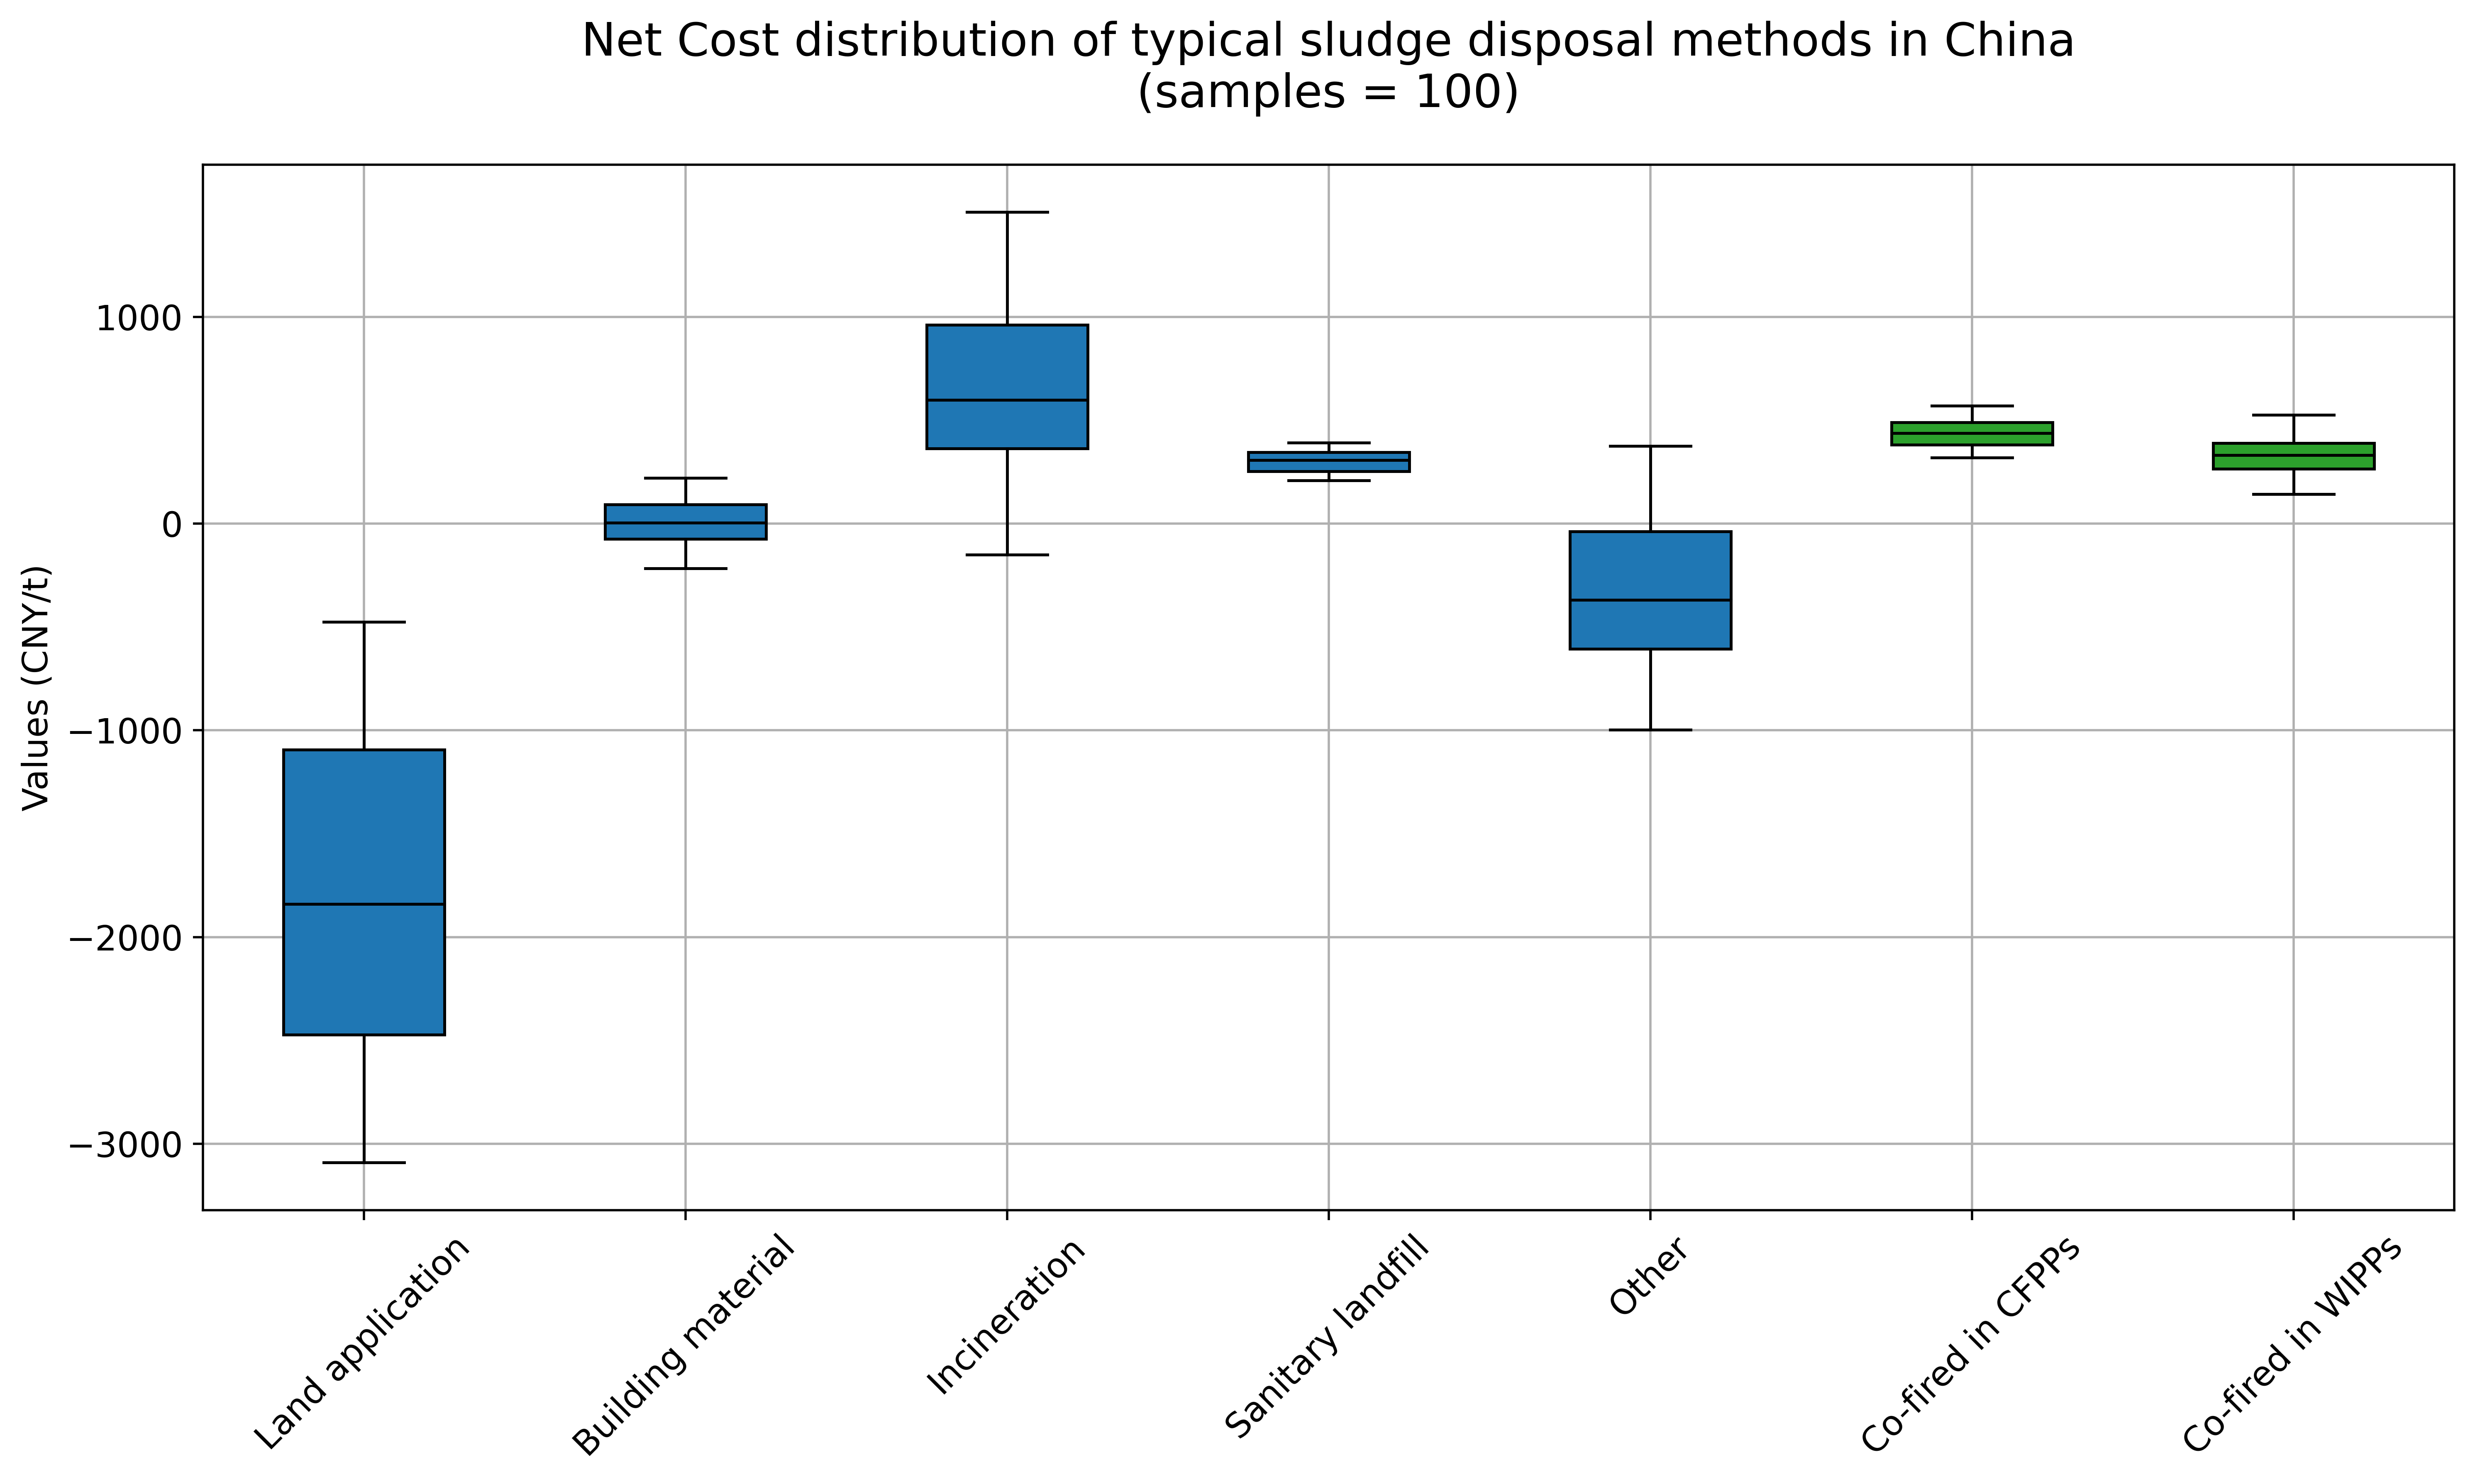

In [18]:
# Plot boxplots for each column in the dataframe

plt.figure(figsize=(14, 8),dpi=500)

box = plt.boxplot(df_100.values, patch_artist=True)

plt.title(f'Net Cost distribution of typical sludge disposal methods in China\n(samples = {num_samples})', fontsize=16, pad=20)
plt.ylabel('Values (CNY/t)', fontsize=12)

# 定义颜色映射
box_colors  = ['#1f77b4'] * 5 + ['#2ca02c'] * 2  # 前5个类别使用蓝色，后2个类别使用绿色

# 设置每个箱子的颜色
for i, (patch, median) in enumerate(zip(box['boxes'], box['medians'])):
    # 填充颜色
    patch.set_facecolor(box_colors[i])
    
    plt.setp(median, color='black')

# 设置新的x轴标签
plt.xticks(rotation=45, fontsize=12)
x_labels = ['Land application', 'Building material', 'Incineration', 'Sanitary landfill', 'Other','Co-fired in CFPPs','Co-fired in WIPPs']
plt.gca().set_xticklabels(x_labels)


# 调整Y轴刻度
plt.yticks(fontsize=12)

plt.grid(True)

# 增加底部边距
plt.subplots_adjust(bottom=0.25)  # 根据需要调整此值

plt.savefig(fr'E:/Test/Inputs/costs/Net_Cost_distribution_{num_samples}.png')
plt.show()

### 多次抽样数据集比较

In [ ]:
# Add a column to identify the dataset
df_100['Dataset'] = '100'
df_1000['Dataset'] = '1000'
df_10000['Dataset'] = '10000'

# Concatenate the dataframes
combined_data = pd.concat([df_100, df_1000, df_10000], ignore_index=True)

# Melt the dataframe for easier plotting with seaborn
melted_data = combined_data.melt(id_vars=['Dataset'], var_name='Category', value_name='Value')

# Plot boxplots for each column in the dataframe, separated by dataset
plt.rc('axes', titlesize=12)    # 控制标题的大小
plt.figure(figsize=(14, 8),dpi=500)
sns.boxplot(x='Category', y='Value', hue='Dataset', data=melted_data, palette='Set3')
plt.title('Costs distribution of Different Sludge Treatment Across Datasets (CNY/t)')
plt.ylabel('Values (CNY/t)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Dataset')
plt.savefig(r'E:/Test/Inputs/costs/Costs distribution of Different Sludge Treatment Across Datasets.png')
plt.show()